In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

Был взят датасет, в котором собрана недвижиомсть в Бангладеше

In [75]:
df = pd.read_csv('real_estate.csv')
df.head()

,Unnamed: 0,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2757 non-null   int64  
 1   Title             2757 non-null   object 
 2   Bedrooms          2757 non-null   float64
 3   Bathrooms         2757 non-null   float64
 4   Floor_no          2745 non-null   object 
 5   Occupancy_status  2757 non-null   object 
 6   Floor_area        2757 non-null   float64
 7   City              2757 non-null   object 
 8   Price_in_taka     2757 non-null   object 
 9   Location          2756 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 215.5+ KB


Title: Заголовок.

Bedrooms: Количество спальных комнат.

Bathrooms: Количество ванных комнат.

Floor_no: Этаж.

Occupancy_status: Указывает, является ли объект свободным или занятым.

Floor_area: Общая площадь объекта недвижимости в квадратных футах.

City: Город, в котором находится объект недвижимости. Этот набор данных включает объявления из Дакки, Чаттограммы, Комиллы, города Нараянгандж и Газипура.

Price_in_taka: Цена, указанная в объявлении о продаже недвижимости в бангладешском Така (৳).

Location: Конкретное местоположение или адрес в черте города.

## Предобработка данных

In [77]:
df = df.drop('Unnamed: 0', axis=1)

In [78]:
df.isnull().sum()

Title                0
Bedrooms             0
Bathrooms            0
Floor_no            12
Occupancy_status     0
Floor_area           0
City                 0
Price_in_taka        0
Location             1
dtype: int64

In [79]:
df = df.dropna(subset=['Bedrooms', 'Bathrooms', 'Floor_area', 'Price_in_taka'])

In [80]:
df['Occupancy_status'] = df['Occupancy_status'].apply(lambda x: 1 if x == 'vacant' else 0)
df['Price_in_taka'] = df['Price_in_taka'].apply(lambda x: float(re.sub('[৳,]', '', x)))

df = pd.get_dummies(df, columns=['City'], drop_first=True)
df['Floor_no'] = df['Floor_no'].apply(lambda x: float(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else np.nan)
df = df.dropna(subset=['Floor_no'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2745 entries, 0 to 2756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  2745 non-null   object 
 1   Bedrooms               2745 non-null   float64
 2   Bathrooms              2745 non-null   float64
 3   Floor_no               2745 non-null   float64
 4   Occupancy_status       2745 non-null   int64  
 5   Floor_area             2745 non-null   float64
 6   Price_in_taka          2745 non-null   float64
 7   Location               2744 non-null   object 
 8   City_cumilla           2745 non-null   bool   
 9   City_dhaka             2745 non-null   bool   
 10  City_gazipur           2745 non-null   bool   
 11  City_narayanganj-city  2745 non-null   bool   
dtypes: bool(4), float64(5), int64(1), object(2)
memory usage: 203.7+ KB


Были удалены строки с отсутствующими значениями, а также колонки были приведены к числовым типам данных

## Анализ

Выдвигаем гипотезу: цена дома зависит от количества спальных комнат

<Axes: xlabel='Bedrooms', ylabel='Price_in_taka'>

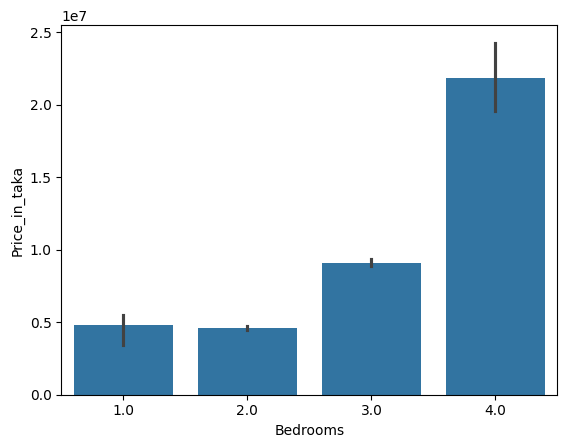

In [82]:
sns.barplot(x=df['Bedrooms'], y=df['Price_in_taka'])

Исходя из графика видно, что гипотеза подтвердилась

Далее выдвигаем гипотезу: этаж влияет на стоимость

<Axes: xlabel='Floor_no', ylabel='Price_in_taka'>

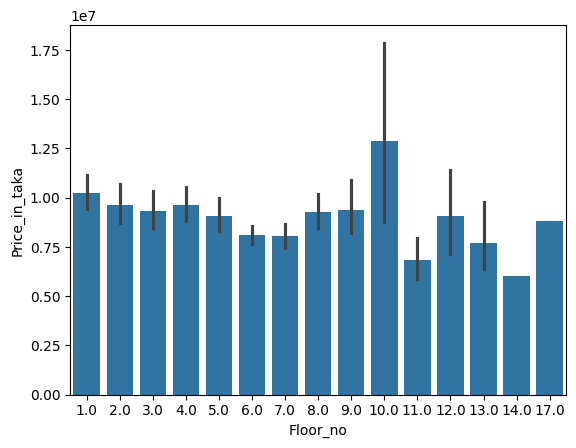

In [83]:
sns.barplot(x=df['Floor_no'], y=df['Price_in_taka'])

Исходя из графика видно, что гипотеза не подтвердилась

## Разделение и нормализация данных

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [85]:
X = df.drop(['Title', 'Price_in_taka', 'Location'], axis=1)
y = df['Price_in_taka']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Данные были разделены на обучающие и тестовые наборы далее была проведена нормализация данных.

## Обучение моделей

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [89]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Absolute Error = {mae}, Root Mean Squared Error = {rmse}, R-squared = {r2}')        

LinearRegression: Mean Absolute Error = 2304894.560641133, Root Mean Squared Error = 3773394.1891758554, R-squared = 0.7424338649914546
RandomForestRegressor: Mean Absolute Error = 1421263.9543777762, Root Mean Squared Error = 2632618.186108306, R-squared = 0.8746281129998468
GradientBoostingRegressor: Mean Absolute Error = 1708631.4864419873, Root Mean Squared Error = 2941255.261520794, R-squared = 0.8435088281833769
XGBRegressor: Mean Absolute Error = 1471274.0286885246, Root Mean Squared Error = 2800963.1757729873, R-squared = 0.8580814364211905


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

models_and_parameters = [
    (RandomForestRegressor(random_state=42), rf_param_grid),
    (GradientBoostingRegressor(random_state=42), gbr_param_grid),
    (XGBRegressor(random_state=42), xgb_param_grid)
]

best_models = {}
for model, params in models_and_parameters:
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1, verbose=0)
    grid_search.fit(X_train_scaled, y_train)
    best_models[type(model).__name__] = grid_search.best_estimator_
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best score for {type(model).__name__}: {grid_search.best_score_}")

Best parameters for RandomForestRegressor: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForestRegressor: 0.835209902312966
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score for GradientBoostingRegressor: 0.8438849303756104
Best parameters for XGBRegressor: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
Best score for XGBRegressor: 0.852677571291314


In [92]:
def plot_prediction_errors(y_test, y_pred):
    residuals = y_test - y_pred

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, bins=30, color='orange')
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')

    plt.tight_layout()
    plt.show()

In [93]:
def plot_feature_importances(model, feature_names, top_n=20):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feat_imp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False).head(top_n)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
        plt.title('Feature Importances')
        plt.tight_layout()
        plt.show()
    else:
        print("Модель не поддерживает feature_importances_")

Model: RandomForestRegressor
Mean Absolute Error: 1540387.058885134
Root Mean Squared Error: 2727680.40957828
R-squared: 0.8654104386853995


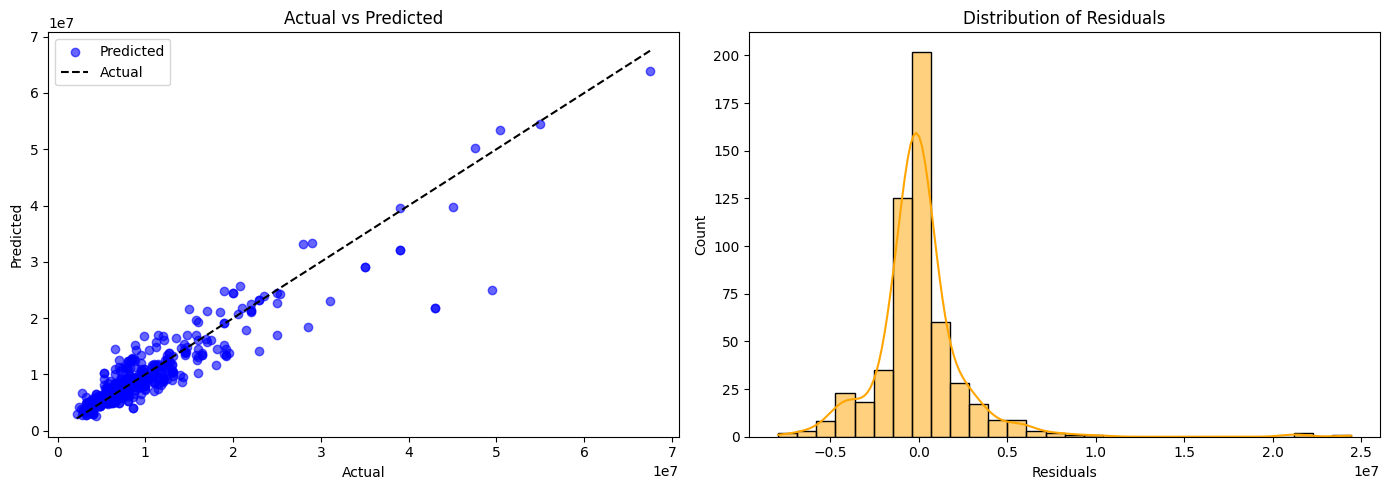

Model: GradientBoostingRegressor
Mean Absolute Error: 1596699.7668872778
Root Mean Squared Error: 2752072.047638455
R-squared: 0.8629926056032531


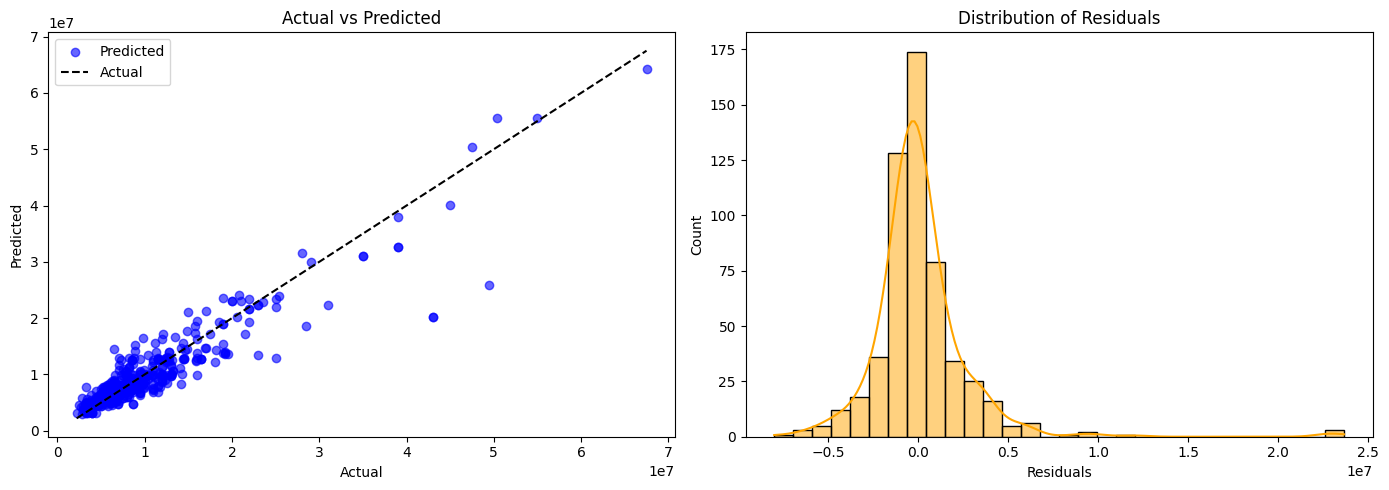

Model: XGBRegressor
Mean Absolute Error: 1555248.9435336976
Root Mean Squared Error: 2880411.64353085
R-squared: 0.8499163012951605


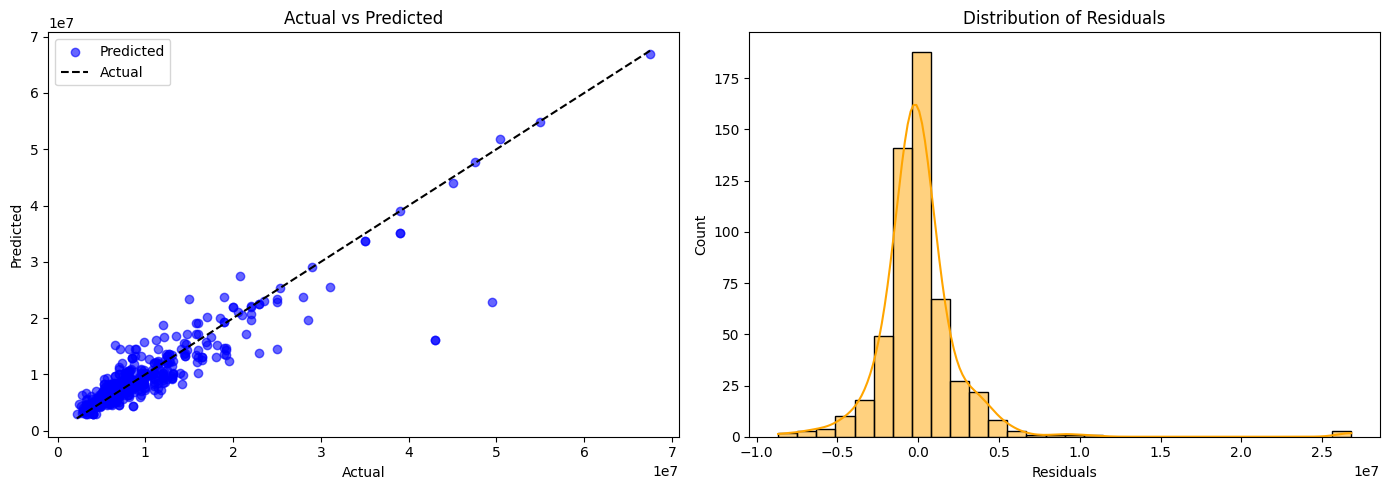

In [94]:
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    plot_prediction_errors(y_test, y_pred)
    print("="*30)

График важности признаков

/var/folders/g0/l78369fn7zz9s5m_hb0rp46r0000gn/T/ipykernel_1570/2755733494.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


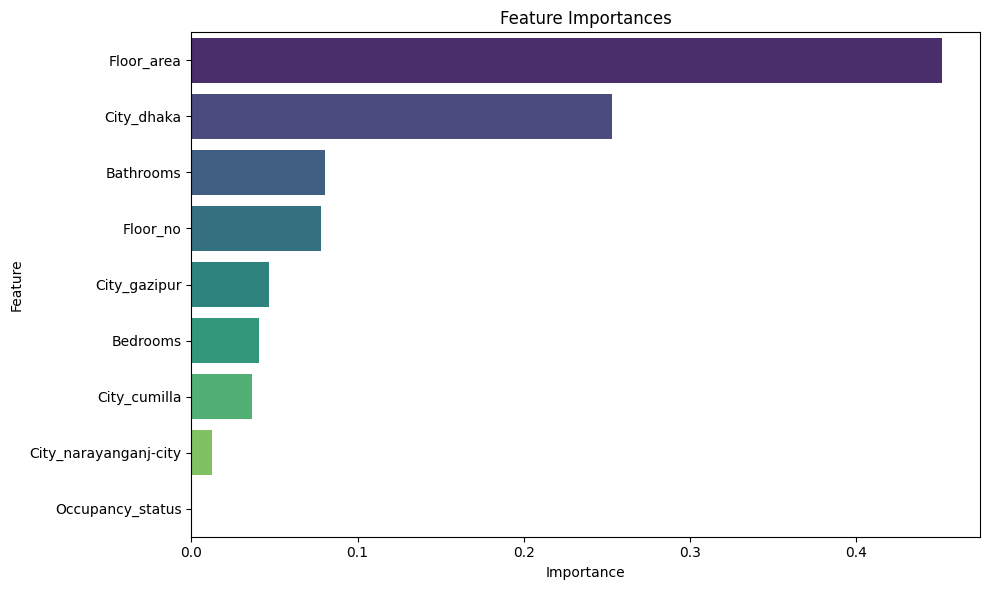

In [95]:
plot_feature_importances(model, X.columns)

## Заключение

Был взят датаесет с недвижимостью в Бангладеше. Была проведена предобработка данных: удалены строки с отстутствующими значениями, колонки были приведены к числовым значениями. Был проведен анализ и выдвинуты 2 гипотезы, одна из которых подтвердилась, а вторая нет. Далее данные разделены на признаки и целевую переменную и на обучающий и тестовый наборы. Затем данные были нормализованы. Затем были выбраны и обучены несколько моделей и лучшей оказалась модель RandomForestRegressor.